In [79]:
import platform as python_platform

class Platform:
    WINDOWS = "Windows"
    MACOS = "Darwin"

platform = python_platform.system()

windows_root_directory = "D:/Vector A/0. KHTN/Nam 4/HKII/Thesis/Brainstorming/DataCrawling"
mac_root_directory = "/Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling"

root_directory = windows_root_directory if platform == Platform.WINDOWS else mac_root_directory

In [80]:
import os
from os.path import join, getsize
import re

import sys
sys.path.append(root_directory)

import matplotlib.pyplot as plt
import pandas as pd

import file_utils as fu

In [81]:
def copy_structure(source, destination):
    '''Copy the structure of the source directory to the destination directory'''
    for root, dirs, files in os.walk(source):
        for dir in dirs:
            new_dir = f"{destination}/{root.replace(source, '')}/{dir}"
            
            regex_pattern = r"\/{2,}"            
            new_dir = re.sub(regex_pattern, "/", new_dir)

            os.makedirs(new_dir, exist_ok=True)

In [82]:
json_directory = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list/json",
    root_path=root_directory
)

raw_html_directory = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list/raw_html",
    root_path=root_directory
)

copy_structure(
    source=raw_html_directory, 
    destination=json_directory
)

In [83]:
json_song_list_link_by_artist_dir = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list_link_by_artist/json",
    root_path=root_directory
)

In [84]:
# Đếm bài hát đã lấy (raw html) tương ứng với letter
def count_raw_html_songs_by_letter(letter):
    letter_directory = f"{raw_html_directory}/{letter.lower()}"

    return sum([1 for root, dirs, files in os.walk(letter_directory) for file in files])

In [85]:
# Đếm số bài hát cần lấy trong file json tương ứng với letter
def count_songs_in_json_by_letter(letter):
    letter_json_file_path = f"{json_song_list_link_by_artist_dir}/{letter.lower()}.json"
    
    n_song = len(fu.read_data_from_json_file(letter_json_file_path))

    return n_song

In [86]:
print(count_raw_html_songs_by_letter("a"))
print(count_songs_in_json_by_letter("a"))

1314
1314


In [87]:
# Thống kê kích thước các file trong thư mục raw_html vào dataframe
def get_size_of_raw_html_files():
    df = pd.DataFrame(columns=["file_name", "size_in_bytes"])
    
    for root, dirs, files in os.walk(raw_html_directory):
        for file in files:
            file_path = join(root, file)
            size = getsize(file_path)
            # FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
            df = pd.concat([df, pd.DataFrame({"file_name": [file], "size_in_bytes": [size]})], ignore_index=True)

    # Sort the dataframe by size
    df = df.sort_values(by="size_in_bytes", ascending=False)
    
    return df

In [88]:
files_size = get_size_of_raw_html_files()
df = pd.DataFrame(files_size)
df.head(df.shape[0])

,file_name,size_in_bytes
1088,the-trend.html,1284603
687,run-away-with-me.html,1156731
1306,back-to-the-future-theme.html,937483
1216,set-fire-to-the-rain.html,759716
613,peacebone.html,676136
...,...,...
228,pianissimo-epilogue.html,844
968,angel-of-music.html,844
605,brother-sport.html,844
623,intro.html,844


<Axes: xlabel='file_name'>

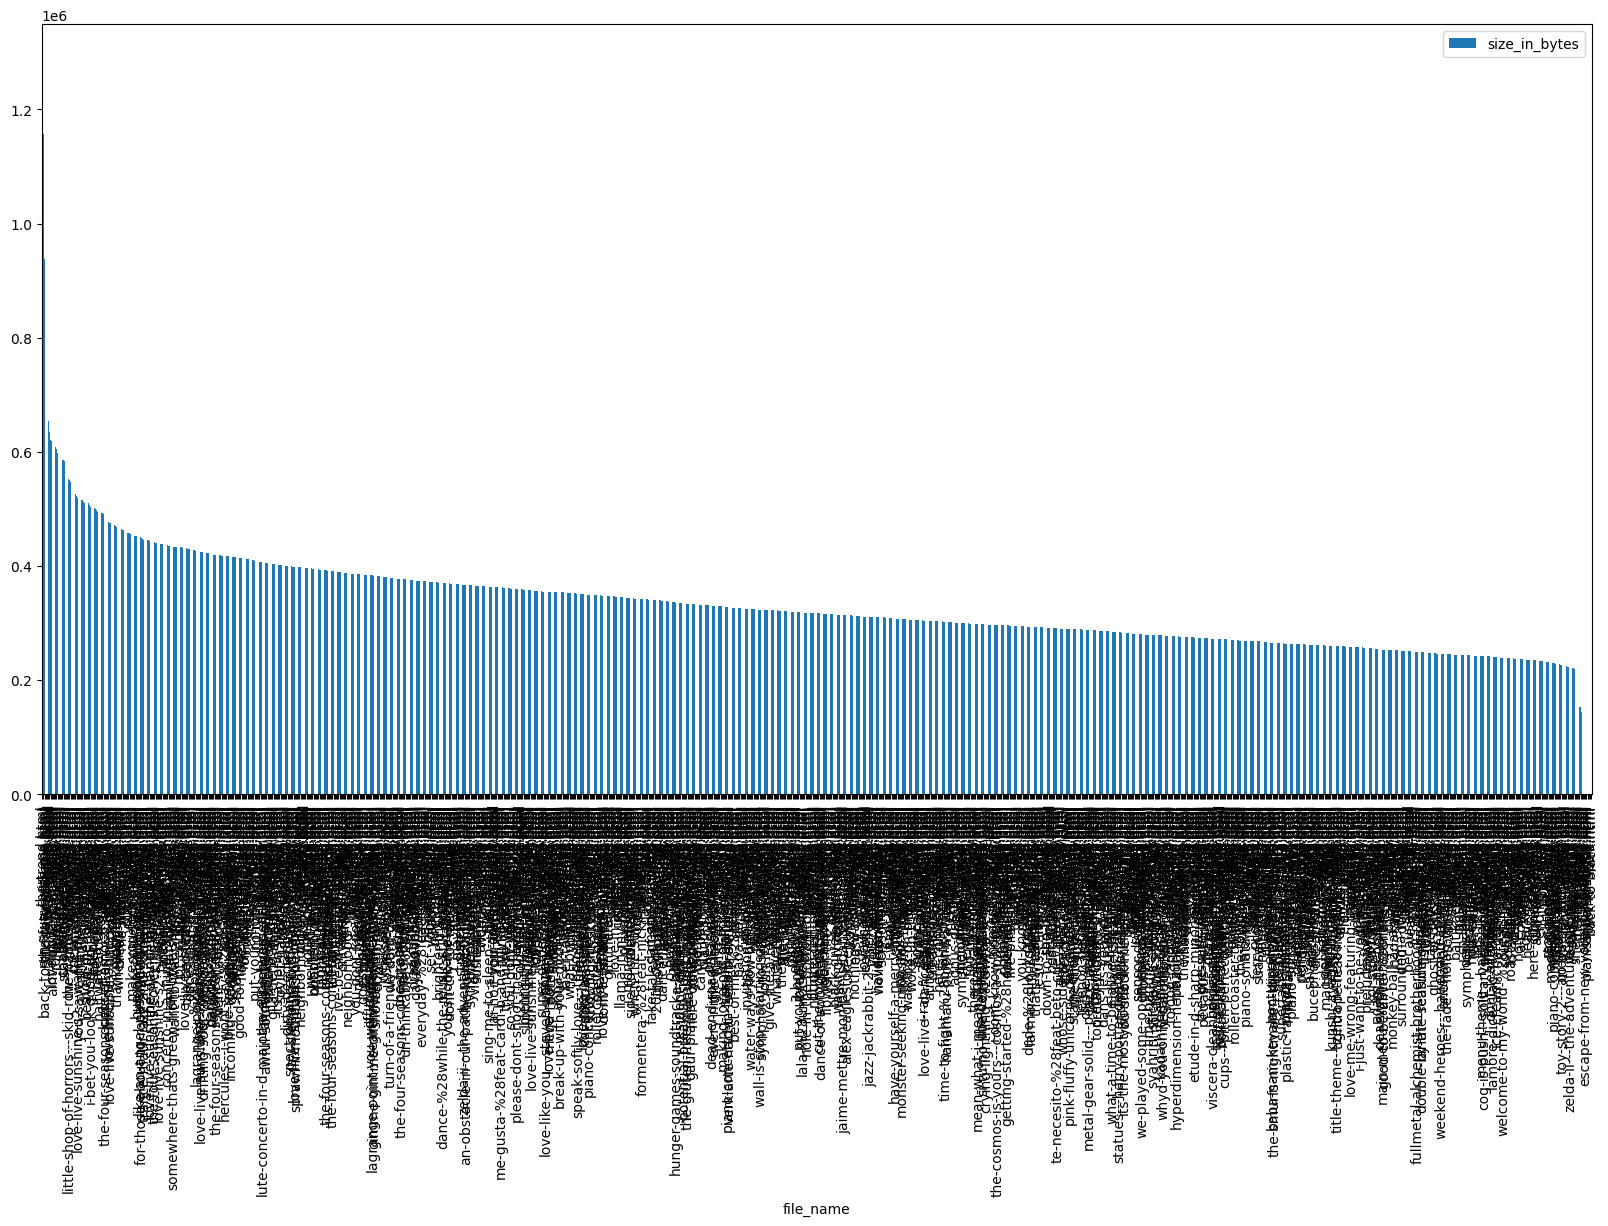

In [89]:
df.plot(kind="bar", x="file_name", y="size_in_bytes", figsize=(20, 10))

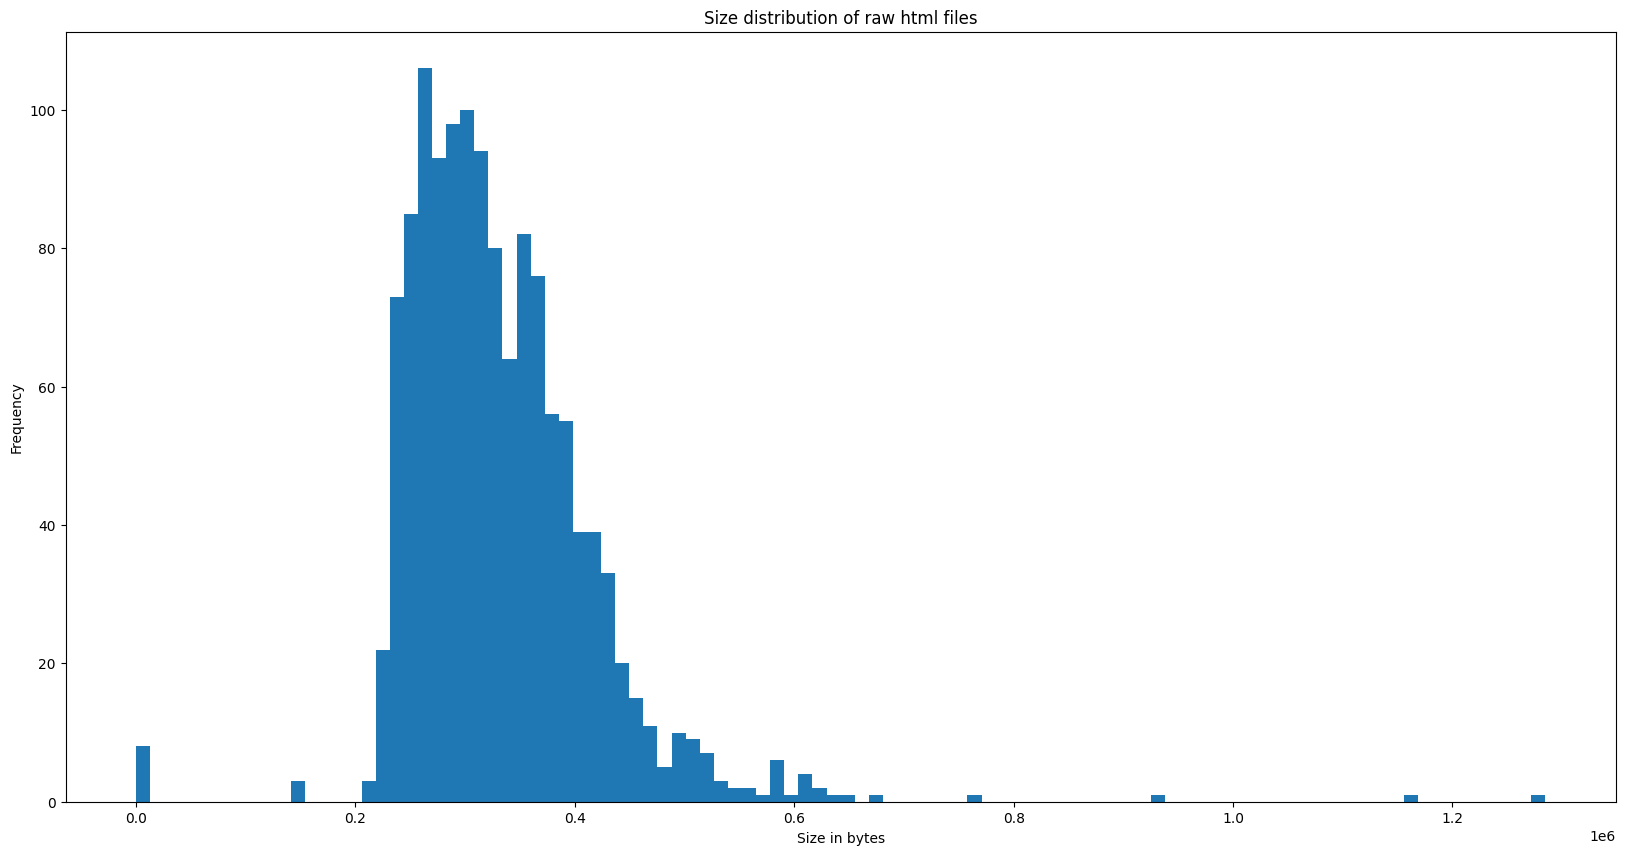

In [90]:
def plot_size_distribution():
    plt.figure(figsize=(20, 10))
    plt.hist(df["size_in_bytes"], bins=100)
    plt.title("Size distribution of raw html files")
    plt.xlabel("Size in bytes")
    plt.ylabel("Frequency")
    plt.show()

plot_size_distribution()

(533, 2)


<Axes: xlabel='file_name'>

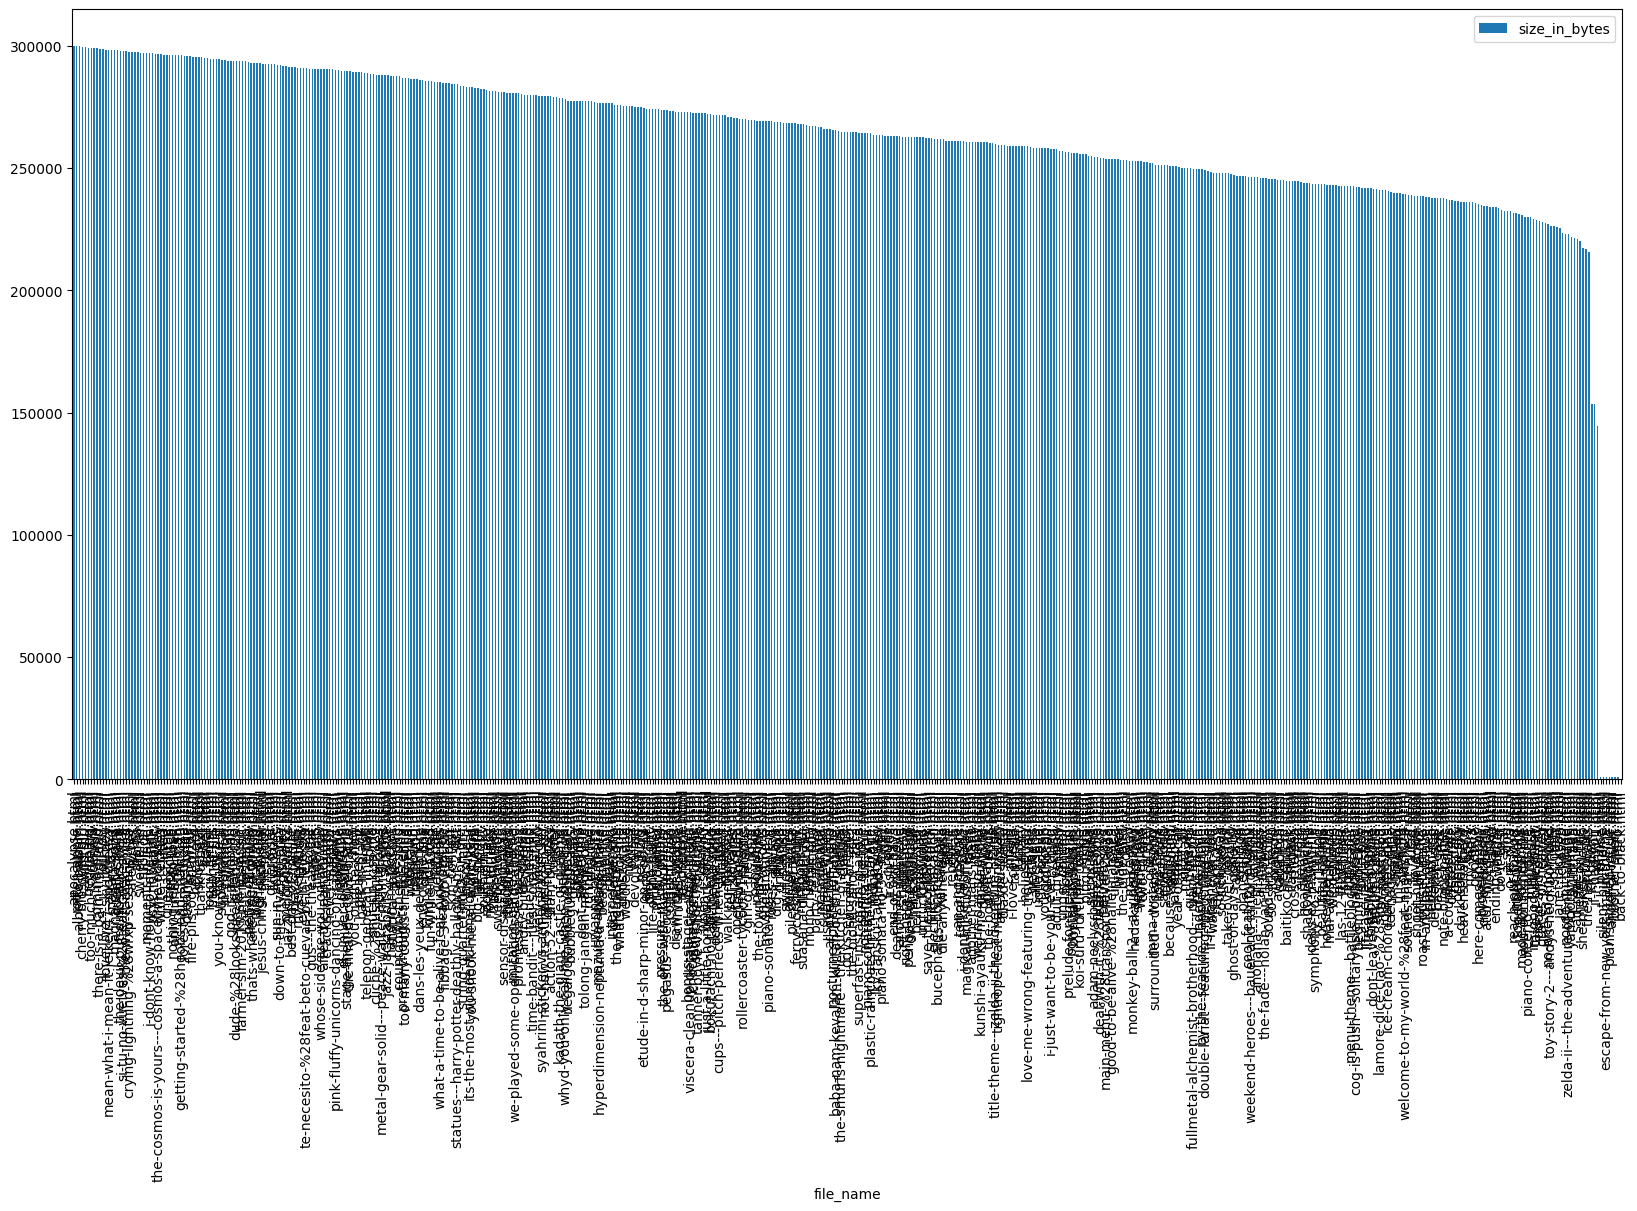

In [91]:
# Lọc ra các file có kích thước nhỏ hơn 300kb và trực quan hóa
df = df[df["size_in_bytes"] < 300000]
print(df.shape)
df.plot(kind="bar", x="file_name", y="size_in_bytes", figsize=(20, 10))

(148, 2)


<Axes: xlabel='file_name'>

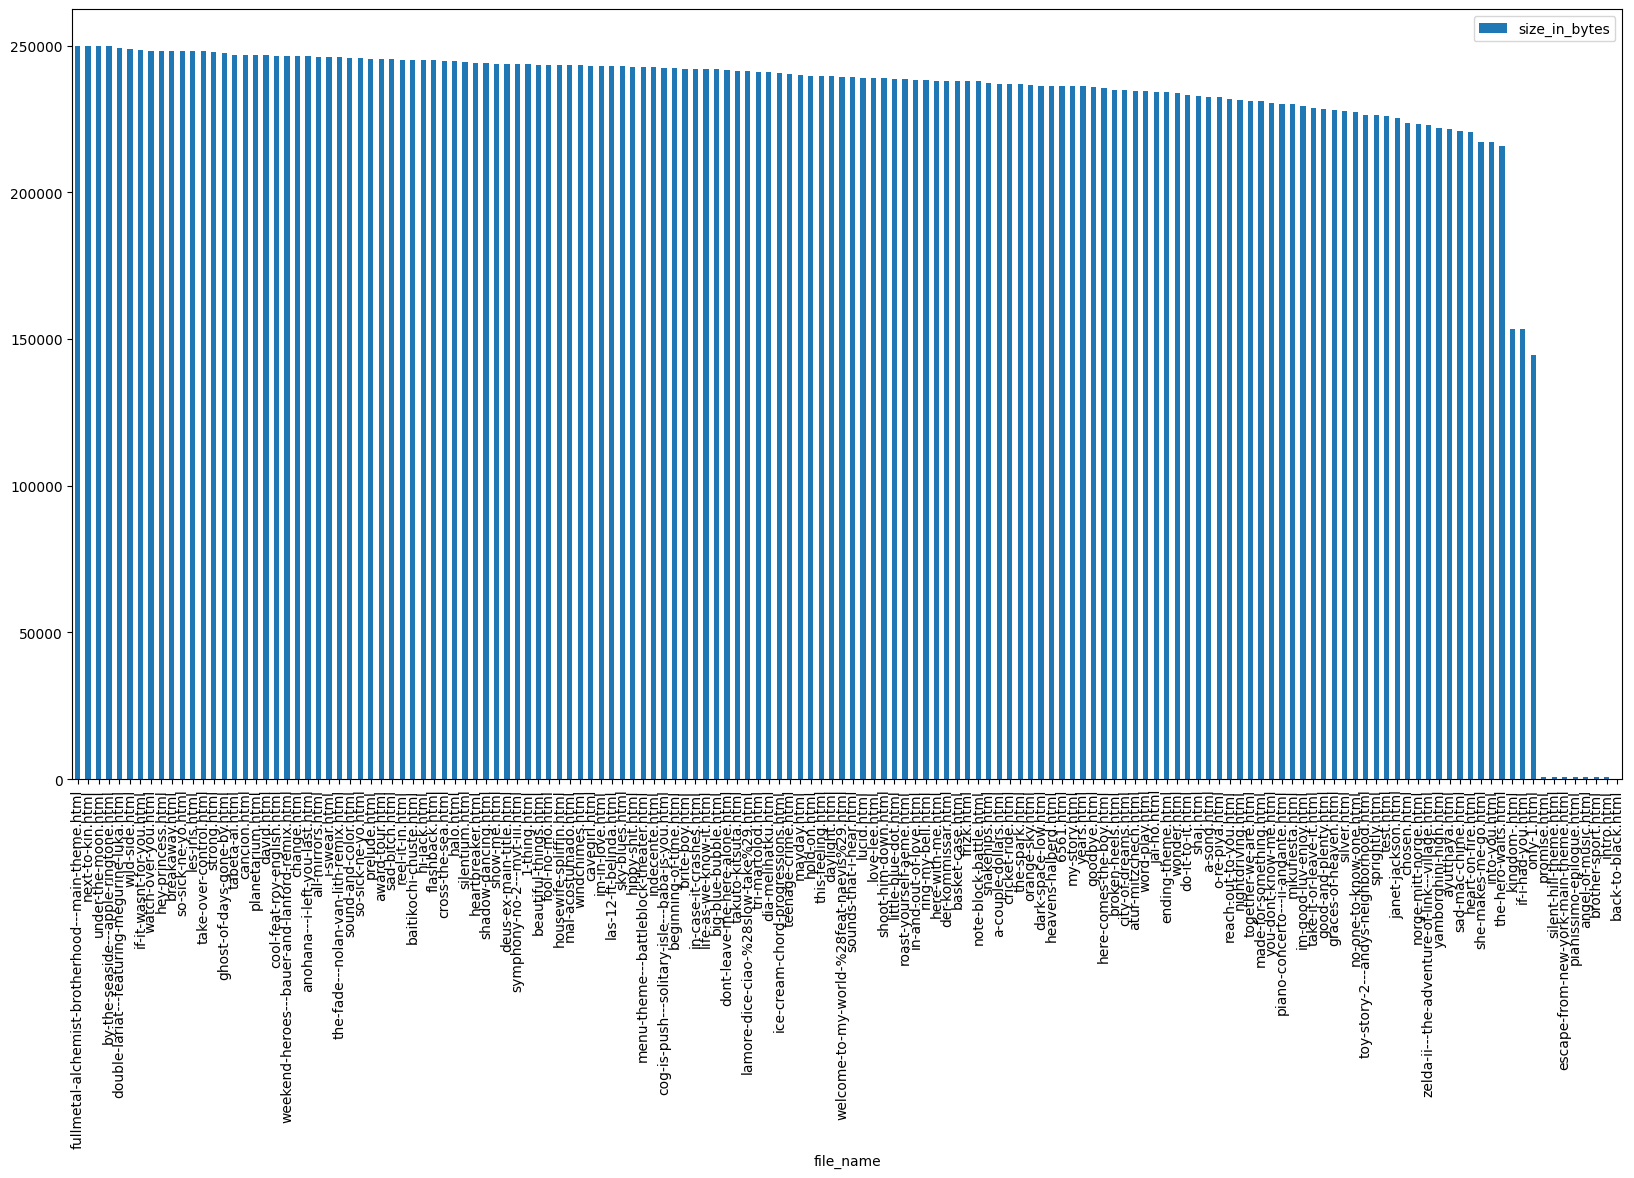

In [92]:
# Lọc ra các file có kích thước nhỏ hơn 250kb và trực quan hóa
df = df[df["size_in_bytes"] < 250000]
print(df.shape)
df.plot(kind="bar", x="file_name", y="size_in_bytes", figsize=(20, 10))

In [94]:
# Print full dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
print(df)

                                              file_name size_in_bytes
85    fullmetal-alchemist-brotherhood---main-theme.html        249873
104                                    next-to-kin.html        249783
705                                 under-the-moon.html        249769
769                by-the-seaside---apple-ringtone.html        249734
856        double-lariat---featuring-megurine-luka.html        249255
1289                                     wild-side.html        248680
231                            if-it-wasnt-for-you.html        248616
321                                 watch-over-you.html        248192
646                                   hey-princess.html        248113
881                                      breakaway.html        248052
50                                   so-sick-ne-yo.html        248025
1046                                      les-iris.html        247997
767                              take-over-control.html        247987
1120                